# Applied statistics project

### Data load and packages

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, RocCurveDisplay, classification_report, confusion_matrix, accuracy_score

In [3]:
data = pd.read_csv('affairs.csv')

## Exploratory data analysis

In [4]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3,32.0,9.0,3.0,3,17,2,5,1
1,3,27.0,13.0,3.0,1,14,3,4,1
2,4,22.0,2.5,0.0,1,16,3,5,1
3,4,37.0,16.5,4.0,3,16,5,5,1
4,5,27.0,9.0,1.0,1,14,3,4,1


In [5]:
data['occupation'] = data['occupation'].astype('category')
data['occupation_husb'] = data['occupation_husb'].astype('category')
data['religious'] = data['religious'].astype('category')
data['rate_marriage'] = data['rate_marriage'].astype('category')

In [6]:
# Structure of the data
data.info()
data.describe()
data.isnull().sum()
data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   rate_marriage    6366 non-null   category
 1   age              6366 non-null   float64 
 2   yrs_married      6366 non-null   float64 
 3   children         6366 non-null   float64 
 4   religious        6366 non-null   category
 5   educ             6366 non-null   int64   
 6   occupation       6366 non-null   category
 7   occupation_husb  6366 non-null   category
 8   affair           6366 non-null   int64   
dtypes: category(4), float64(3), int64(2)
memory usage: 274.5 KB


rate_marriage      5
age                6
yrs_married        7
children           6
religious          4
educ               6
occupation         6
occupation_husb    6
affair             2
dtype: int64

In [7]:
# Summary stats for continuous variables
continuous_vars = ['age', 'yrs_married', 'children', 'educ']
data[continuous_vars].describe()

,age,yrs_married,children,educ
count,6366.000000,6366.000000,6366.000000,6366.000000
mean,29.082862,9.009425,1.396874,14.209865
std,6.847882,7.280120,1.433471,2.178003
min,17.500000,0.500000,0.000000,9.000000
25%,22.000000,2.500000,0.000000,12.000000
50%,27.000000,6.000000,1.000000,14.000000
75%,32.000000,16.500000,2.000000,16.000000
max,42.000000,23.000000,5.500000,20.000000


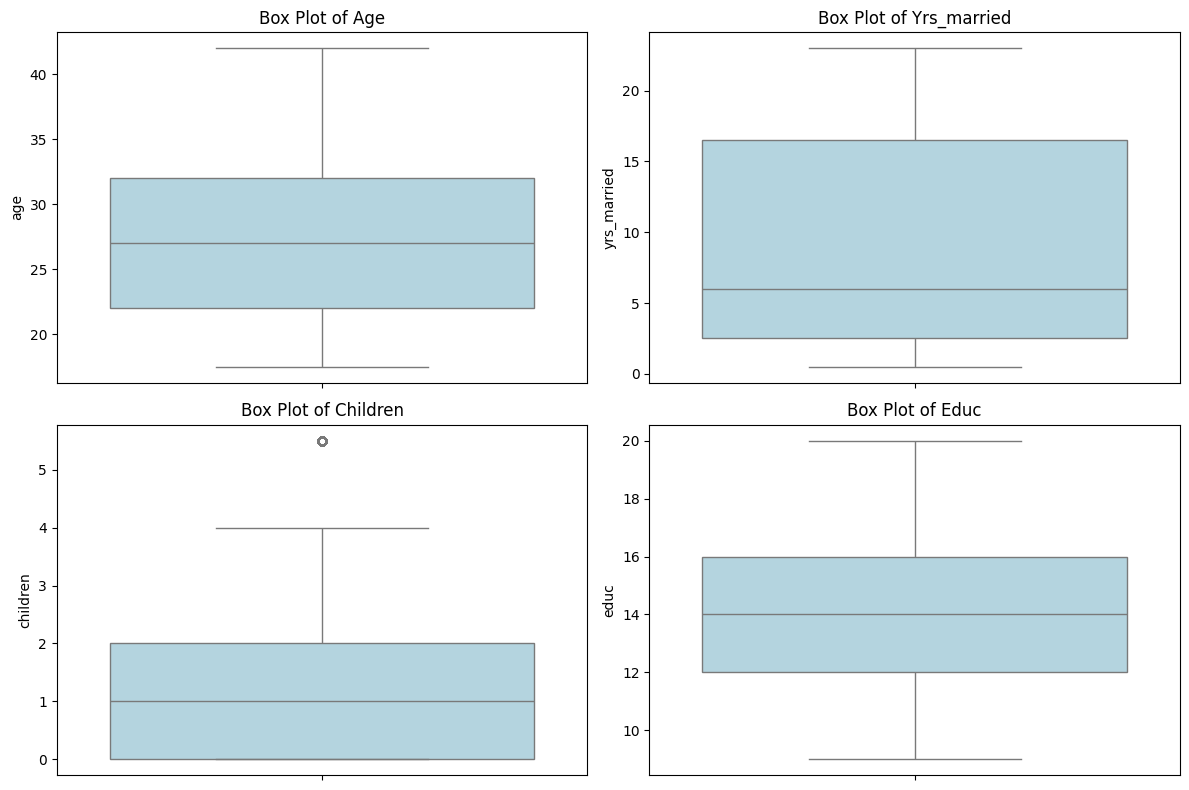

In [8]:
# Box plots for continuous variables
plt.figure(figsize=(12, 8))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[var], color='lightblue')
    plt.title(f'Box Plot of {var.capitalize()}')
plt.tight_layout()
plt.show()

/var/folders/1m/z6bjwn212yg9839rhl52qvtm0000gn/T/ipykernel_76313/3732545212.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['had_affair'], y=data[var], palette='pastel')
/var/folders/1m/z6bjwn212yg9839rhl52qvtm0000gn/T/ipykernel_76313/3732545212.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['had_affair'], y=data[var], palette='pastel')
/var/folders/1m/z6bjwn212yg9839rhl52qvtm0000gn/T/ipykernel_76313/3732545212.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['had_affair'], y=data[var], palette='pastel')
/var

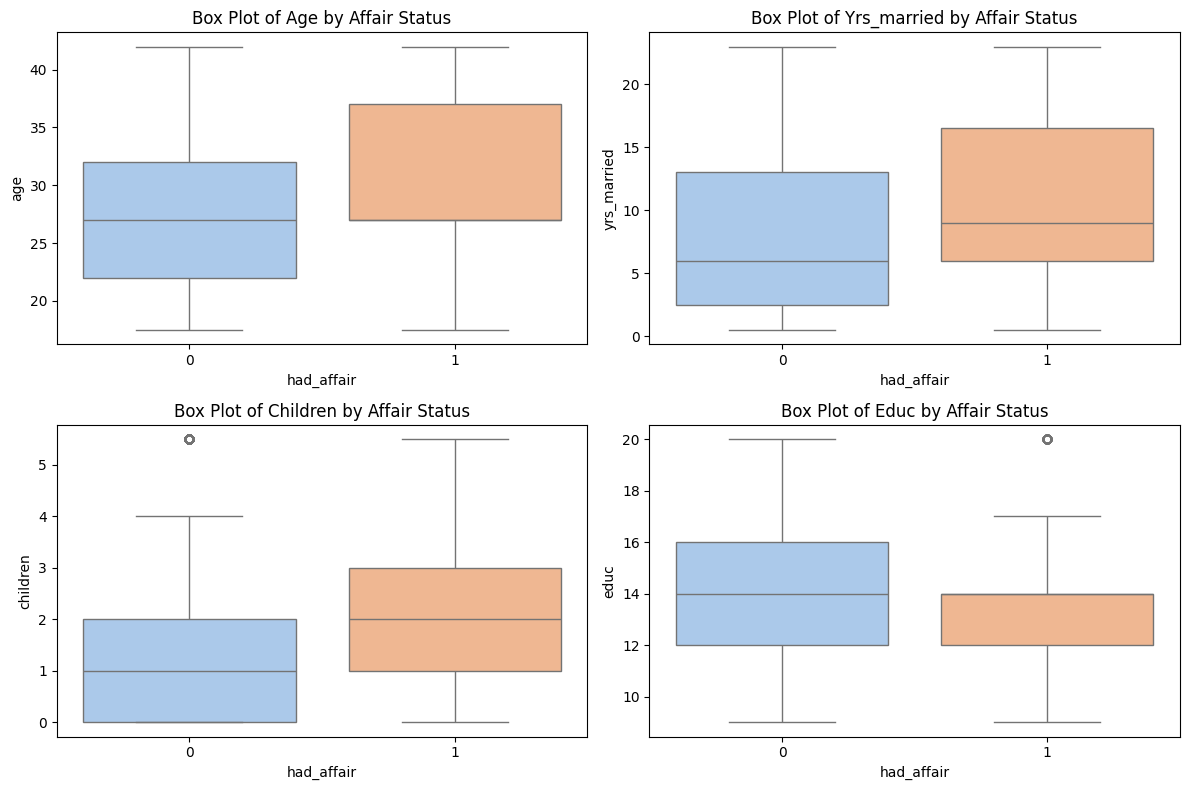

In [9]:
## Bivariate Analysis
# Box plots of continuous variables by affair status
data['had_affair'] = (data['affair'] > 0).astype(int)
plt.figure(figsize=(12, 8))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data['had_affair'], y=data[var], palette='pastel')
    plt.title(f'Box Plot of {var.capitalize()} by Affair Status')
plt.tight_layout()
plt.show()

In [10]:
# Grouped means of continuous variables by affair status
data.groupby('had_affair')[continuous_vars].mean()

,age,yrs_married,children,educ
had_affair,,,,
0,28.390679,7.989335,1.238813,14.322977
1,30.537019,11.152460,1.728933,13.972236


In [11]:
# Cross tabulations for categorical variables by affair status
categorical_vars = ['occupation', 'occupation_husb', 'religious', 'rate_marriage']

for var in categorical_vars:
    ctab = pd.crosstab(data[var], data['had_affair'], normalize='index')
    print(f'Cross tabulation of {var} by Affair Status:')
    print(ctab)
    print()

Cross tabulation of occupation by Affair Status:
had_affair         0         1
occupation                    
1           0.829268  0.170732
2           0.706636  0.293364
3           0.653252  0.346748
4           0.738277  0.261723
5           0.582432  0.417568
6           0.633028  0.366972

Cross tabulation of occupation_husb by Affair Status:
had_affair              0         1
occupation_husb                    
1                0.790393  0.209607
2                0.674312  0.325688
3                0.646939  0.353061
4                0.685222  0.314778
5                0.661608  0.338392
6                0.688679  0.311321

Cross tabulation of religious by Affair Status:
had_affair         0         1
religious                     
1           0.600392  0.399608
2           0.638730  0.361270
3           0.708092  0.291908
4           0.818598  0.181402

Cross tabulation of rate_marriage by Affair Status:
had_affair            0         1
rate_marriage                    
1   

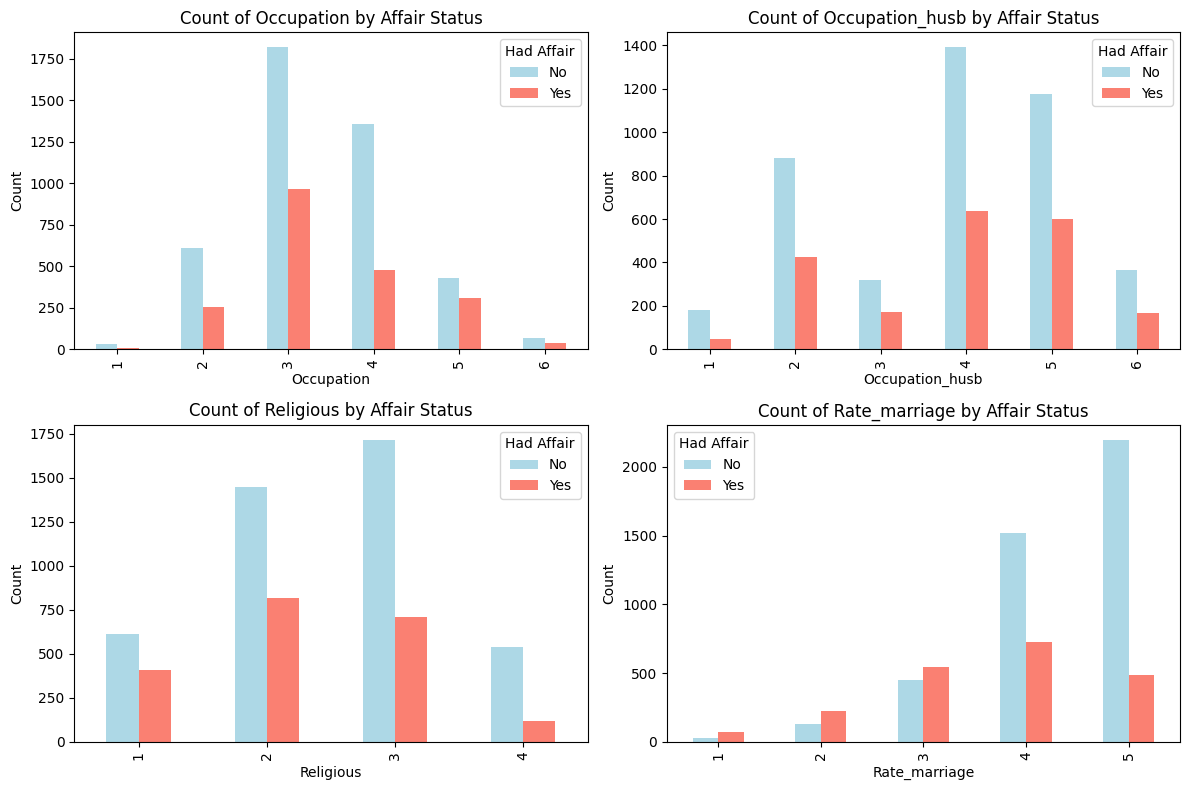

In [12]:
# Grouped bar charts for categorical variables by affair status in one figure
new_cat = data[['occupation', 'occupation_husb', 'religious', 'rate_marriage']]
# number of plots
n = len(new_cat.columns)

# choose 2 columns, calculate rows dynamically
cols = 2
rows = math.ceil(n / cols)

plt.figure(figsize=(12, 4 * rows))

for i, var in enumerate(new_cat.columns, 1):
    plt.subplot(rows, cols, i)
    ctab = pd.crosstab(data[var], data['had_affair'])
    ctab.plot(kind='bar', stacked=False, ax=plt.gca(), color=['lightblue', 'salmon'])
    plt.title(f'Count of {var.capitalize()} by Affair Status')
    plt.xlabel(var.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Had Affair', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


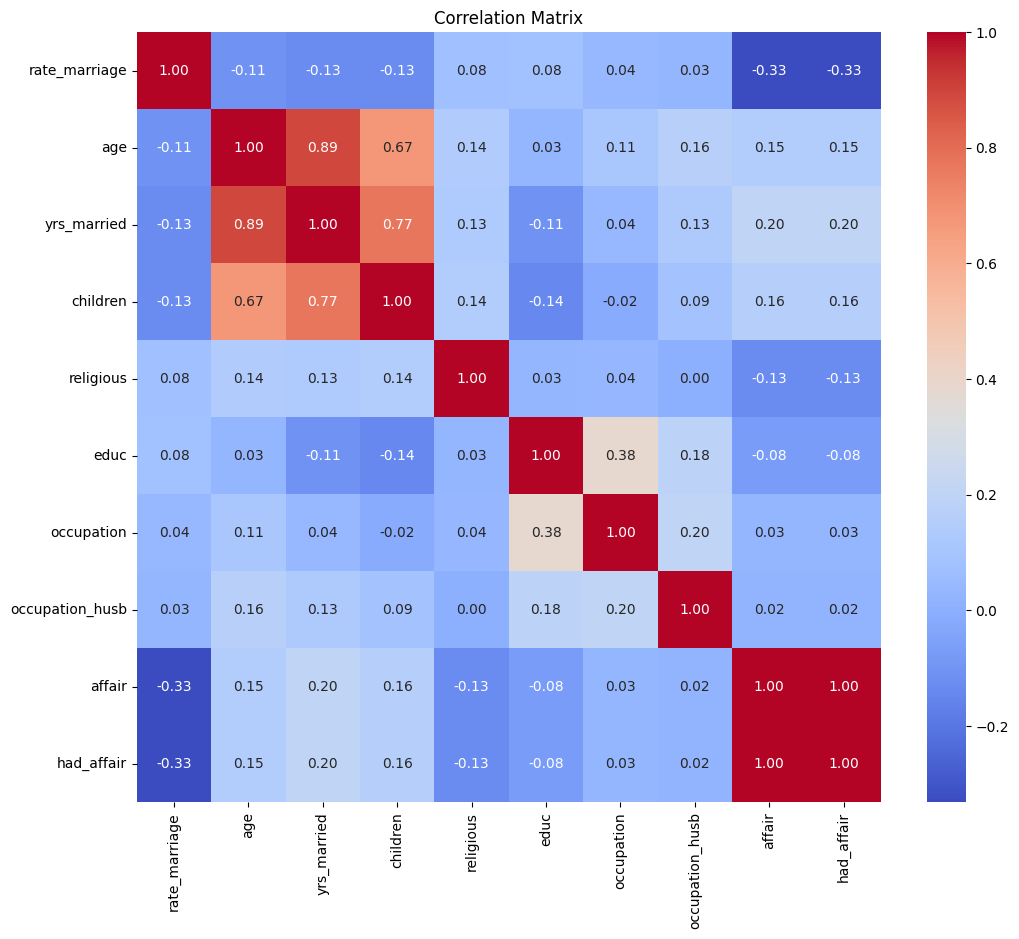

In [13]:
# Correlation matrix of all variables
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Model building

In [14]:
df_encoded = pd.get_dummies(data[categorical_vars], drop_first=True)
df = pd.concat([data[continuous_vars], df_encoded], axis=1)

In [15]:
df.head()

,age,yrs_married,children,educ,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_husb_2,...,occupation_husb_4,occupation_husb_5,occupation_husb_6,religious_2,religious_3,religious_4,rate_marriage_2,rate_marriage_3,rate_marriage_4,rate_marriage_5
0,32.0,9.0,3.0,17,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,27.0,13.0,3.0,14,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2,22.0,2.5,0.0,16,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,37.0,16.5,4.0,16,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
4,27.0,9.0,1.0,14,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [16]:
# Split in train and test sets

X = df
y = data['affair']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
# Standardize variables

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index  # preserve feature names
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index  # preserve feature names
)

In [18]:
# Logistic Regression Model

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [19]:
# Coefficients for each feature
coef = logreg.coef_[0]

# Intercept
intercept = logreg.intercept_[0]

# Combine with feature names
features = X_train_scaled.columns 
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coef
})
print(coef_df)
print("Intercept:", intercept)

              Feature  Coefficient
0                 age    -0.438956
1         yrs_married     0.816991
2            children     0.019074
3                educ     0.013793
4        occupation_2     0.135885
5        occupation_3     0.348926
6        occupation_4     0.232346
7        occupation_5     0.357479
8        occupation_6     0.143776
9   occupation_husb_2    -0.033313
10  occupation_husb_3     0.008489
11  occupation_husb_4    -0.018026
12  occupation_husb_5     0.000149
13  occupation_husb_6     0.002204
14        religious_2    -0.142316
15        religious_3    -0.310887
16        religious_4    -0.398167
17    rate_marriage_2    -0.111516
18    rate_marriage_3    -0.316927
19    rate_marriage_4    -0.879916
20    rate_marriage_5    -1.265108
Intercept: -0.8826854414251138


In [20]:
equation = f"logit(p) = {intercept:.3f} "
for f, c in zip(features, coef):
    equation += f"+ ({c:.3f} * {f}) "
print(equation)

logit(p) = -0.883 + (-0.439 * age) + (0.817 * yrs_married) + (0.019 * children) + (0.014 * educ) + (0.136 * occupation_2) + (0.349 * occupation_3) + (0.232 * occupation_4) + (0.357 * occupation_5) + (0.144 * occupation_6) + (-0.033 * occupation_husb_2) + (0.008 * occupation_husb_3) + (-0.018 * occupation_husb_4) + (0.000 * occupation_husb_5) + (0.002 * occupation_husb_6) + (-0.142 * religious_2) + (-0.311 * religious_3) + (-0.398 * religious_4) + (-0.112 * rate_marriage_2) + (-0.317 * rate_marriage_3) + (-0.880 * rate_marriage_4) + (-1.265 * rate_marriage_5) 


## Model selection

In [23]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train_scaled)  
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.536933
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5070
Method:                           MLE   Df Model:                           21
Date:                Mon, 08 Dec 2025   Pseudo R-squ.:                  0.1460
Time:                        14:44:26   Log-Likelihood:                -2734.1
converged:                       True   LL-Null:                       -3201.4
Covariance Type:            nonrobust   LLR p-value:                2.223e-184
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8833      0.035    -25.556      0.000      -0.951      -0.816
age     

In [24]:
X_train_scaled = X_train_scaled.drop(columns=['occupation_husb_6'])
X_test_scaled = X_test_scaled.drop(columns=['occupation_husb_6'])
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [25]:
# Coefficients for each feature
coef = logreg.coef_[0]

# Intercept
intercept = logreg.intercept_[0]

# Combine with feature names
features = X_train_scaled.columns  # or the columns of X_train_scaled if scaled
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coef
})
print(coef_df)
print("Intercept:", intercept)

              Feature  Coefficient
0                 age    -0.439429
1         yrs_married     0.818022
2            children     0.018476
3                educ     0.014501
4        occupation_2     0.136963
5        occupation_3     0.350324
6        occupation_4     0.233281
7        occupation_5     0.358210
8        occupation_6     0.144107
9   occupation_husb_2    -0.034594
10  occupation_husb_3     0.007486
11  occupation_husb_4    -0.019791
12  occupation_husb_5    -0.001701
13        religious_2    -0.141111
14        religious_3    -0.310048
15        religious_4    -0.397430
16    rate_marriage_2    -0.111276
17    rate_marriage_3    -0.315829
18    rate_marriage_4    -0.878589
19    rate_marriage_5    -1.263732
Intercept: -0.8825625929410658


In [26]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train_scaled)  
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.536933
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5071
Method:                           MLE   Df Model:                           20
Date:                Mon, 08 Dec 2025   Pseudo R-squ.:                  0.1460
Time:                        14:44:34   Log-Likelihood:                -2734.1
converged:                       True   LL-Null:                       -3201.4
Covariance Type:            nonrobust   LLR p-value:                3.209e-185
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8833      0.035    -25.556      0.000      -0.951      -0.816
age     

In [27]:
X_train_scaled = X_train_scaled.drop(columns=['occupation_husb_5'])
X_test_scaled = X_test_scaled.drop(columns=['occupation_husb_5'])
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Add constant for intercept
X_train_sm = sm.add_constant(X_train_scaled)  
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.536933
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5072
Method:                           MLE   Df Model:                           19
Date:                Mon, 08 Dec 2025   Pseudo R-squ.:                  0.1460
Time:                        14:44:37   Log-Likelihood:                -2734.1
converged:                       True   LL-Null:                       -3201.4
Covariance Type:            nonrobust   LLR p-value:                4.518e-186
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8833      0.035    -25.556      0.000      -0.951      -0.816
age     

In [28]:
X_train_scaled = X_train_scaled.drop(columns=['occupation_husb_3'])
X_test_scaled = X_test_scaled.drop(columns=['occupation_husb_3'])
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Add constant for intercept
X_train_sm = sm.add_constant(X_train_scaled)  
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.536939
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5073
Method:                           MLE   Df Model:                           18
Date:                Mon, 08 Dec 2025   Pseudo R-squ.:                  0.1460
Time:                        14:44:40   Log-Likelihood:                -2734.1
converged:                       True   LL-Null:                       -3201.4
Covariance Type:            nonrobust   LLR p-value:                6.354e-187
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8833      0.035    -25.556      0.000      -0.951      -0.816
age     

In [29]:
X_train_scaled = X_train_scaled.drop(columns=['children'])
X_test_scaled = X_test_scaled.drop(columns=['children'])
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Add constant for intercept
X_train_sm = sm.add_constant(X_train_scaled)  
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.536948
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5074
Method:                           MLE   Df Model:                           17
Date:                Mon, 08 Dec 2025   Pseudo R-squ.:                  0.1460
Time:                        14:44:42   Log-Likelihood:                -2734.1
converged:                       True   LL-Null:                       -3201.4
Covariance Type:            nonrobust   LLR p-value:                8.855e-188
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8832      0.035    -25.556      0.000      -0.951      -0.815
age     

In [30]:
X_train_scaled = X_train_scaled.drop(columns=['educ'])
X_test_scaled = X_test_scaled.drop(columns=['educ'])
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Add constant for intercept
X_train_sm = sm.add_constant(X_train_scaled)  
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.536958
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5075
Method:                           MLE   Df Model:                           16
Date:                Mon, 08 Dec 2025   Pseudo R-squ.:                  0.1459
Time:                        14:44:46   Log-Likelihood:                -2734.2
converged:                       True   LL-Null:                       -3201.4
Covariance Type:            nonrobust   LLR p-value:                1.193e-188
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8832      0.035    -25.555      0.000      -0.951      -0.815
age     

In [31]:
X_train_scaled = X_train_scaled.drop(columns=['occupation_husb_4'])
X_test_scaled = X_test_scaled.drop(columns=['occupation_husb_4'])
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Add constant for intercept
X_train_sm = sm.add_constant(X_train_scaled)  
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.536996
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5076
Method:                           MLE   Df Model:                           15
Date:                Mon, 08 Dec 2025   Pseudo R-squ.:                  0.1459
Time:                        14:44:50   Log-Likelihood:                -2734.4
converged:                       True   LL-Null:                       -3201.4
Covariance Type:            nonrobust   LLR p-value:                1.801e-189
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8831      0.035    -25.554      0.000      -0.951      -0.815
age     

In [32]:
X_train_scaled = X_train_scaled.drop(columns=['occupation_husb_2'])
X_test_scaled = X_test_scaled.drop(columns=['occupation_husb_2'])
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Add constant for intercept
X_train_sm = sm.add_constant(X_train_scaled)  
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.537070
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5077
Method:                           MLE   Df Model:                           14
Date:                Mon, 08 Dec 2025   Pseudo R-squ.:                  0.1458
Time:                        14:44:53   Log-Likelihood:                -2734.8
converged:                       True   LL-Null:                       -3201.4
Covariance Type:            nonrobust   LLR p-value:                3.142e-190
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8828      0.035    -25.552      0.000      -0.951      -0.815
age           

In [33]:
X_train_scaled = X_train_scaled.drop(columns=['occupation_2'])
X_test_scaled = X_test_scaled.drop(columns=['occupation_2'])
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Add constant for intercept
X_train_sm = sm.add_constant(X_train_scaled)  
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.537166
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5078
Method:                           MLE   Df Model:                           13
Date:                Mon, 08 Dec 2025   Pseudo R-squ.:                  0.1456
Time:                        14:44:56   Log-Likelihood:                -2735.2
converged:                       True   LL-Null:                       -3201.4
Covariance Type:            nonrobust   LLR p-value:                5.881e-191
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8824      0.035    -25.549      0.000      -0.950      -0.815
age           

In [34]:
X_train_scaled = X_train_scaled.drop(columns=['occupation_4'])
X_test_scaled = X_test_scaled.drop(columns=['occupation_4'])
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Add constant for intercept
X_train_sm = sm.add_constant(X_train_scaled)  
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.537380
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5079
Method:                           MLE   Df Model:                           12
Date:                Mon, 08 Dec 2025   Pseudo R-squ.:                  0.1453
Time:                        14:44:58   Log-Likelihood:                -2736.3
converged:                       True   LL-Null:                       -3201.4
Covariance Type:            nonrobust   LLR p-value:                1.918e-191
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8825      0.035    -25.552      0.000      -0.950      -0.815
age           

In [35]:
X_train_scaled = X_train_scaled.drop(columns=['rate_marriage_2'])
X_test_scaled = X_test_scaled.drop(columns=['rate_marriage_2'])
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Add constant for intercept
X_train_sm = sm.add_constant(X_train_scaled)  
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.537761
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 5092
Model:                          Logit   Df Residuals:                     5080
Method:                           MLE   Df Model:                           11
Date:                Mon, 08 Dec 2025   Pseudo R-squ.:                  0.1447
Time:                        14:45:01   Log-Likelihood:                -2738.3
converged:                       True   LL-Null:                       -3201.4
Covariance Type:            nonrobust   LLR p-value:                1.392e-191
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8836      0.035    -25.602      0.000      -0.951      -0.816
age           

## Predictions

In [36]:
# Predictions
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

In [37]:
# Accuracy
accuracy_score(y_test, y_pred)

0.7080062794348508

In [39]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[743, 120],
       [252, 159]])

In [40]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       863
           1       0.57      0.39      0.46       411

    accuracy                           0.71      1274
   macro avg       0.66      0.62      0.63      1274
weighted avg       0.69      0.71      0.69      1274



AUC: 0.7282184875371096


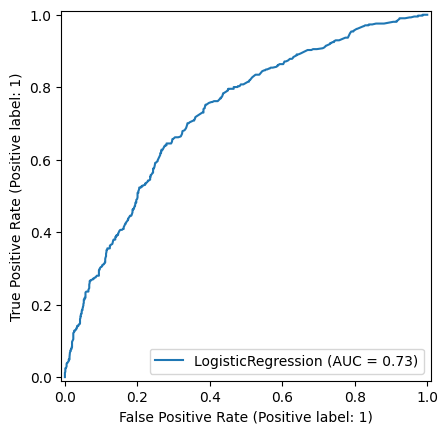

In [41]:
# ROC curve and AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test)
plt.show()

In [ ]:
# Interpretation of coefficients
odds_ratios = pd.DataFrame({
    "Feature": X.columns,
    "Odds Ratio": np.exp(logreg.coef_[0])
})

odds_ratios.sort_values("Odds Ratio", ascending=False)

,Feature,Odds Ratio
1,yrs_married,2.263678
12,occupation_5,1.429720
10,occupation_3,1.417545
11,occupation_4,1.261557
13,occupation_6,1.154625
9,occupation_2,1.145550
2,children,1.019257
3,educ,1.013889
5,occupation_husb_3,1.008525
8,occupation_husb_6,1.002207
